# Linear regression using tensorflow

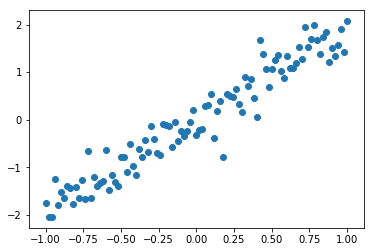

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * .33
plt.scatter(x_train, y_train)
plt.show()

1.89993


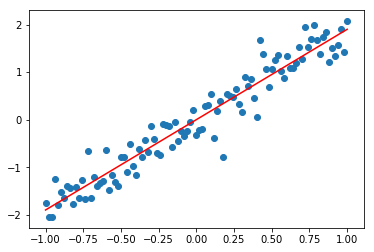

In [3]:
import tensorflow as tf

learning_rate = 0.01
training_epochs = 100

X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X, w):
    return tf.multiply(X, w)

# w is a scalar, so this model can't handle bias
w = tf.Variable(0.0, name="weights")

y_model = model(X,w)
cost = tf.square(Y - y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x,y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X:x, Y:y})
        
w_val = sess.run(w)
sess.close()

print(w_val)

plt.scatter(x_train, y_train)
y_learned = x_train*w_val
plt.plot(x_train, y_learned, 'r')
plt.show()

In [5]:
import tfgraphviz as tfg
g = tfg.board(tf.get_default_graph())
g.view()

'G.gv.pdf'